# Superstore Data Analysis

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import datetime

## Import Data Source

In [179]:
df_orders = pd.read_csv('Sample-Superstore_Orders.csv')
df_orders.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,8/11/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,8/11/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12/6/16,16/6/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11/10/15,18/10/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11/10/15,18/10/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [180]:
df_returns = pd.read_csv('Sample-Superstore_Returns.csv')
df_returns.head()

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999


In [181]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [182]:
df_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  296 non-null    object
 1   Order ID  296 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


## Data Preprocessing

In [183]:
# adjust all date fields to datetime fields
df_orders['Order Date'] = pd.to_datetime(df_orders['Order Date'], format='%d/%m/%y')
df_orders['Ship Date'] = pd.to_datetime(df_orders['Ship Date'], format='%d/%m/%y')

In [184]:
# create new year, month, day fields for orders
df_orders['OrderYr'] = df_orders['Order Date'].dt.year
df_orders['OrderMth'] = df_orders['Order Date'].dt.month
df_orders['OrderDay'] = df_orders['Order Date'].dt.day

In [185]:
df_orders['OrderYr'].unique() # 4 years of data from 2014-2017

array([2016, 2015, 2014, 2017])

In [186]:
df_orders['Country'].unique() # all data are in USA

array(['United States'], dtype=object)

## Initial Data Analysis Findings

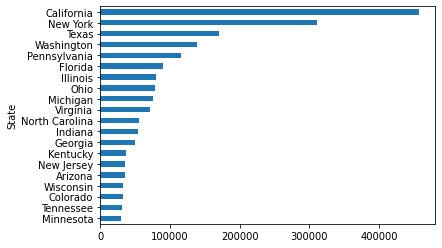

In [309]:
# top 20 states with most sales
df_orders.groupby('State')['Sales'].sum().sort_values(ascending=True).tail(20).plot.barh();

<AxesSubplot:ylabel='State'>

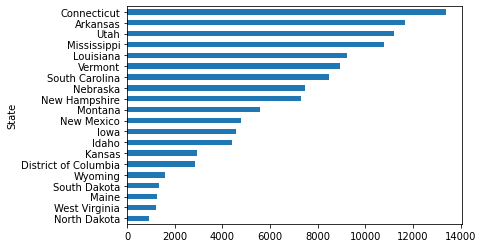

In [310]:
# 20 states with least sales
df_orders.groupby('State')['Sales'].sum().sort_values(ascending=True).head(20).plot.barh()

<AxesSubplot:ylabel='State'>

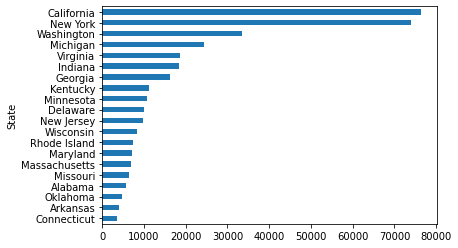

In [311]:
# top 20 states by total profit
df_orders.groupby('State')['Profit'].sum().sort_values(ascending=True).tail(20).plot.barh()

<AxesSubplot:ylabel='State'>

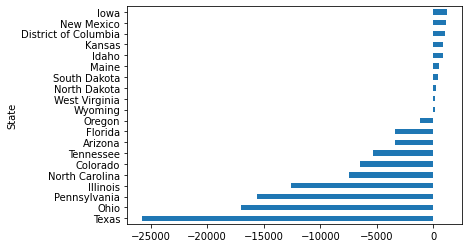

In [312]:
# bottom 20 states by total profit
df_orders.groupby('State')['Profit'].sum().sort_values(ascending=True).head(20).plot.barh()

In [191]:
StatesSales_top20 = df_orders.groupby('State')['Sales'].sum().sort_values(ascending=False).head(20)
df_StatesSales_top20 = pd.DataFrame(StatesSales_top20)
df_StatesSales_top20.head()

,Sales
State,
California,457687.6315
New York,310876.2710
Texas,170188.0458
Washington,138641.2700
Pennsylvania,116511.9140


In [192]:
StatesProfits_bottom20 = df_orders.groupby('State')['Profit'].sum().sort_values(ascending=False).tail(20)
df_StatesProfits_bottom20 = pd.DataFrame(StatesProfits_bottom20)

In [193]:
# The TOP 20 States by Sales that also have the lowest profit
df_StatesSales_top20.merge(df_StatesProfits_bottom20, on='State')

,Sales,Profit
State,,
Texas,170188.0458,-25729.3563
Pennsylvania,116511.9140,-15559.9603
Florida,89473.7080,-3399.3017
Illinois,80166.1010,-12607.8870
Ohio,78258.1360,-16971.3766
North Carolina,55603.1640,-7490.9122
Arizona,35282.0010,-3427.9246
Colorado,32108.1180,-6527.8579
Tennessee,30661.8730,-5341.6936


## Pareto Principle Check - States V.S. Sales

In [194]:
StatesSales = df_orders.groupby('State')['Sales'].sum().sort_values(ascending=False)
df_StatesSales = pd.DataFrame(StatesSales)

In [195]:
df_StatesSales['CumulativePercentage'] = (df_StatesSales.cumsum() / df_StatesSales.sum() * 100).round(2)
df_StatesSales.head(16)

,Sales,CumulativePercentage
State,,
California,457687.6315,19.92
New York,310876.2710,33.46
Texas,170188.0458,40.87
Washington,138641.2700,46.90
Pennsylvania,116511.9140,51.97
Florida,89473.7080,55.87
Illinois,80166.1010,59.36
Ohio,78258.1360,62.76
Michigan,76269.6140,66.08


In [307]:
def create_pareto_plot(df, col, price, log = True):
    
    plt.rcParams["axes.facecolor"] = "#FFFFFF"
    fig, ax = plt.subplots(figsize = (15, 5), dpi = 150, facecolor = "#FFFFFF")
    plt.rcParams["axes.grid"] = False
    
    if log == True:
        sns.barplot(x = np.arange(len(df)), y = np.log(df[price]),  ax = ax, color = "#101820")
        ax.set_ylabel("Total Price (Log - Scale)")
    else:
        sns.barplot(x = np.arange(len(df)), y = df[price],  ax = ax, color = "#101820")

    ax2 = ax.twinx()
    
    sns.lineplot(x = np.arange(len(df)), y = df.CumulativePercentage, ax = ax2, color = "#0019AA")
    ax2.axhline(80, color = "#008878", linestyle = "dashed", alpha = 1)
    ax2.axhline(90, color = "#008878", linestyle = "dashed", alpha = 0.75)

    vlines = [int(len(df) * x / 10) for x in range(1, 10)]
    for vline in vlines: ax2.axvline(vline, color = "#008878", linestyle = "dashed", alpha = 0.1)
        
    interaction_80 = (df.shape[0] - df[df.CumulativePercentage >= 80].shape[0])
    ax2.axvline(interaction_80, color = "#008878", linestyle = "dashed", alpha = 1)

    interaction_80_percentage = round((interaction_80 / df.shape[0]) * 100)
    plt.text(interaction_80 + 25, 95, str(interaction_80_percentage) + "%")   
    
    prop = dict(arrowstyle= "-|>", color = "#000000", lw = 1.5, ls = "--")
    plt.annotate("", xy = (interaction_80 - 10, 80),  xytext = (interaction_80 + 120 , 73), arrowprops = prop)
    
    interaction_90 = (df.shape[0] - df[df.CumulativePercentage >= 90].shape[0])
    ax2.axvline(interaction_90, color = "#008878", linestyle = "dashed", alpha = 0.8)
    interaction_90_percentage = round((interaction_90 / df.shape[0]) * 100)
    plt.text(interaction_90 + 25, 95, str(interaction_90_percentage) + "%")   
    plt.annotate("", xy = (interaction_90 - 10, 90),  xytext = (interaction_90 + 120 , 83), arrowprops = prop)

    ax2.yaxis
    ax.set_yticks([])
    plt.xticks([])
    ax.set_ylabel("Revenue", fontname = "Times New Roman")
    ax2.set_ylabel("Cumulative Percentage", fontname = "Times New Roman")
    subject = "States" if col == "States" else "Products"
    plt.title("Pareto Chart for " + subject, fontname = "Times New Roman")
    ax.set_xlabel(subject, fontname = "Times New Roman")
    sns.despine(left = True, right = True, bottom = True, top = True)
    plt.show()

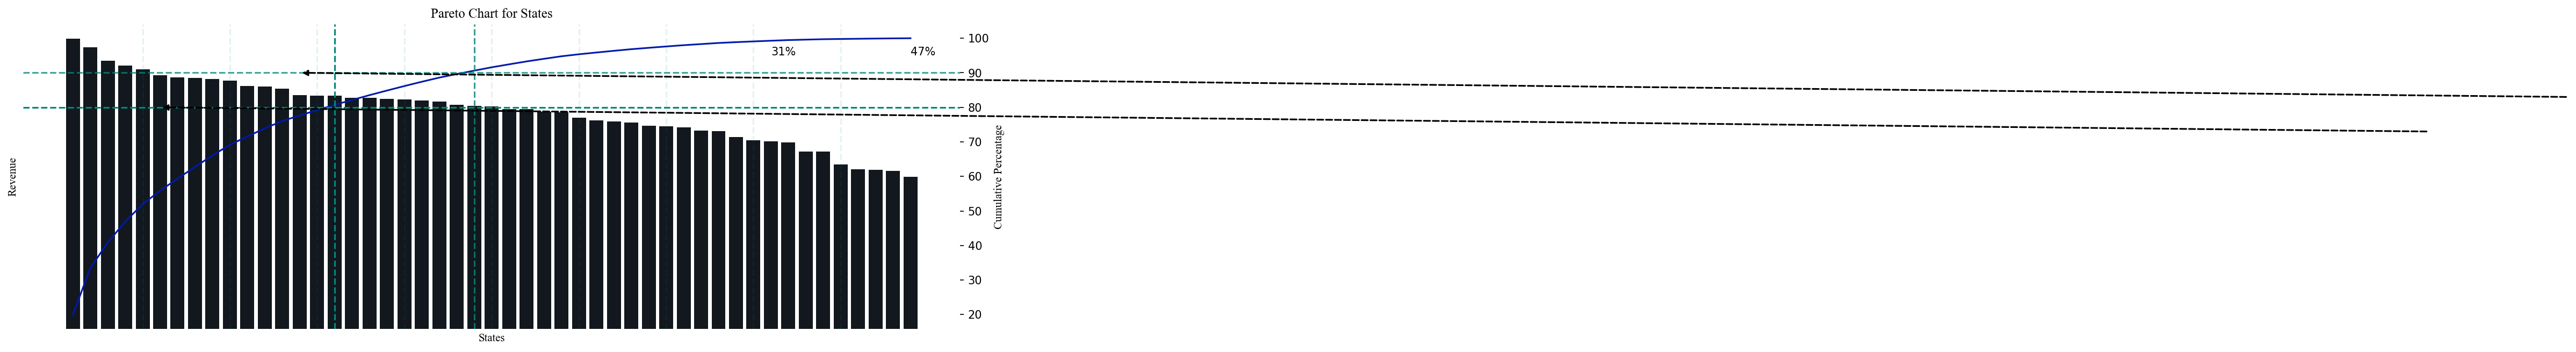

In [308]:
create_pareto_plot(df_StatesSales, "States", "Sales", log = True) #plot it and log it to see clearly

#### Summary:
- we can see that 80% of superstore sales comes from top 31% of states
- 90% of the superstore sales comes from top 47% of states

### Top 20% of the states by sales contributed to 40.9% of the total sales.

In [198]:
df_StatesSales.quantile(0.80, interpolation='higher')

Sales                   70636.72
CumulativePercentage       99.08
Name: 0.8, dtype: float64

In [199]:
df_orders['Sales'].sum()

2297200.8603

In [200]:
df_StatesSales[df_StatesSales['Sales']>=138641.27].sum()/df_orders['Sales'].sum()

Sales                   0.408650
CumulativePercentage    0.000041
dtype: float64

Summary: Pareto Principle does not apply in this case (does not meet 80% of the total profit).

### Top 20% of the states with the most profit contributed to 64.2% of the total profit.

In [201]:
StatesProfit = df_orders.groupby('State')['Profit'].sum().sort_values(ascending=False).head(20)
df_StatesProfit = pd.DataFrame(StatesProfit)

In [202]:
df_StatesProfit.quantile(0.80, interpolation='higher')

Profit    24463.1876
Name: 0.8, dtype: float64

In [203]:
df_orders['Profit'].sum()

286397.0217

In [204]:
df_StatesProfit[df_StatesProfit['Profit']>=24463.1876].sum()/df_orders['Profit'].sum()

Profit    0.641845
dtype: float64

Summary: Pareto Principel does not apply in this case (does not meet 80% of the total profit).

## Pareto Principle Check - Categories V.S. Sales

There are 
- 3 types of categories
- 17 types of sub-category

In [205]:
df_orders.groupby('Category')['Sales'].sum().sort_values(ascending=False)

Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64

In [206]:
# Get the first 5 substrings from Product ID to identify the product and its categories
df_orders['ProductID5'] = df_orders['Product ID'].str.slice(0, 6)

In [207]:
df_orders['ProductID5'].unique()

array(['FUR-BO', 'FUR-CH', 'OFF-LA', 'FUR-TA', 'OFF-ST', 'FUR-FU',
       'OFF-AR', 'TEC-PH', 'OFF-BI', 'OFF-AP', 'OFF-PA', 'TEC-AC',
       'OFF-EN', 'OFF-FA', 'OFF-SU', 'TEC-MA', 'TEC-CO'], dtype=object)

In [208]:
ProductSales = df_orders.groupby('ProductID5')['Sales'].sum().sort_values(ascending=False)
df_ProductSales = pd.DataFrame(ProductSales)
df_ProductSales['CumulativePercentage'] = (df_ProductSales.cumsum() / df_ProductSales.sum() * 100).round(2)
df_ProductSales

,Sales,CumulativePercentage
ProductID5,,
TEC-PH,330007.0540,14.37
FUR-CH,328449.1030,28.66
OFF-ST,223843.6080,38.41
FUR-TA,206965.5320,47.42
OFF-BI,203412.7330,56.27
TEC-MA,189238.6310,64.51
TEC-AC,167380.3180,71.80
TEC-CO,149528.0300,78.31
FUR-BO,114879.9963,83.31


In [313]:
def create_pareto_plot(df, col, price, log = True):
    
    plt.rcParams["axes.facecolor"] = "#FFFFFF"
    fig, ax = plt.subplots(figsize = (15, 5), dpi = 150, facecolor = "#FFFFFF")
    plt.rcParams["axes.grid"] = False
    
    if log == True:
        sns.barplot(x = np.arange(len(df)), y = np.log(df[price]),  ax = ax, color = "#101820")
        ax.set_ylabel("Total Price (Log - Scale)")
    else:
        sns.barplot(x = np.arange(len(df)), y = df[price],  ax = ax, color = "#101820")

    ax2 = ax.twinx()
    
    sns.lineplot(x = np.arange(len(df)), y = df.CumulativePercentage, ax = ax2, color = "#0019AA")
    ax2.axhline(80, color = "#008878", linestyle = "dashed", alpha = 1)
    ax2.axhline(90, color = "#008878", linestyle = "dashed", alpha = 0.75)

    vlines = [int(len(df) * x / 10) for x in range(1, 10)]
    for vline in vlines: ax2.axvline(vline, color = "#008878", linestyle = "dashed", alpha = 0.1)
        
    interaction_80 = (df.shape[0] - df[df.CumulativePercentage >= 80].shape[0])
    ax2.axvline(interaction_80, color = "#008878", linestyle = "dashed", alpha = 1)

    interaction_80_percentage = round((interaction_80 / df.shape[0]) * 100)
    plt.text(interaction_80 + 25, 95, str(interaction_80_percentage) + "%")   
    
    prop = dict(arrowstyle= "-|>", color = "#000000", lw = 1.5, ls = "--")
    plt.annotate("", xy = (interaction_80 - 10, 80),  xytext = (interaction_80 + 120 , 73), arrowprops = prop)
    
    interaction_90 = (df.shape[0] - df[df.CumulativePercentage >= 90].shape[0])
    ax2.axvline(interaction_90, color = "#008878", linestyle = "dashed", alpha = 0.8)
    interaction_90_percentage = round((interaction_90 / df.shape[0]) * 100)
    plt.text(interaction_90 + 25, 95, str(interaction_90_percentage) + "%")   
    plt.annotate("", xy = (interaction_90 - 10, 90),  xytext = (interaction_90 + 120 , 83), arrowprops = prop)

    ax2.yaxis
    ax.set_yticks([])
    plt.xticks([])
    ax.set_ylabel("Revenue", fontname = "Times New Roman")
    ax2.set_ylabel("Cumulative Percentage", fontname = "Times New Roman")
    subject = "ProductID5" if col == "ProductID5" else "Products"
    plt.title("Pareto Chart for " + subject, fontname = "Times New Roman")
    ax.set_xlabel(subject, fontname = "Times New Roman")
    sns.despine(left = True, right = True, bottom = True, top = True)
    plt.show()

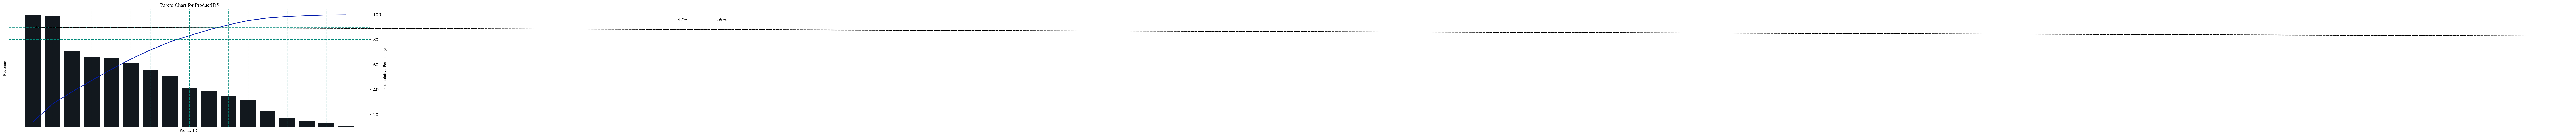

In [314]:
create_pareto_plot(df_ProductSales, "ProductID5", "Sales", log = False) #plot it to see clearly

#### Summary:
- we can see that 80% of superstore sales comes from top 47% of the products.
- 90% of the superstore sales comes from top 59% of products.
- Hence, Pareto Principle does not apply on products.

## Pareto Principle Check - Customers V.S. Sales

In [211]:
CustomersSales = df_orders.groupby('Customer ID')['Sales'].sum().sort_values(ascending=False)
df_CustomersSales = pd.DataFrame(CustomersSales)
df_CustomersSales['CumulativePercentage'] = (df_CustomersSales.cumsum() / df_CustomersSales.sum() * 100).round(2)
df_CustomersSales

,Sales,CumulativePercentage
Customer ID,,
SM-20320,25043.050,1.09
TC-20980,19052.218,1.92
RB-19360,15117.339,2.58
TA-21385,14595.620,3.21
AB-10105,14473.571,3.84
...,...,...
RS-19870,22.328,100.00
MG-18205,16.739,100.00
CJ-11875,16.520,100.00


In [212]:
df_orders["Customer ID"].nunique()

793

In [315]:
def create_pareto_plot(df, col, price, log = True):
    
    plt.rcParams["axes.facecolor"] = "#FFFFFF"
    fig, ax = plt.subplots(figsize = (15, 5), dpi = 150, facecolor = "#FFFFFF")
    plt.rcParams["axes.grid"] = False
    
    if log == True:
        sns.barplot(x = np.arange(len(df)), y = np.log(df[price]),  ax = ax, color = "#101820")
        ax.set_ylabel("Total Price (Log - Scale)")
    else:
        sns.barplot(x = np.arange(len(df)), y = df[price],  ax = ax, color = "#101820")

    ax2 = ax.twinx()
    
    sns.lineplot(x = np.arange(len(df)), y = df.CumulativePercentage, ax = ax2, color = "#0019AA")
    ax2.axhline(80, color = "#008878", linestyle = "dashed", alpha = 1)
    ax2.axhline(90, color = "#008878", linestyle = "dashed", alpha = 0.75)

    vlines = [int(len(df) * x / 10) for x in range(1, 10)]
    for vline in vlines: ax2.axvline(vline, color = "#008878", linestyle = "dashed", alpha = 0.1)
        
    interaction_80 = (df.shape[0] - df[df.CumulativePercentage >= 80].shape[0])
    ax2.axvline(interaction_80, color = "#008878", linestyle = "dashed", alpha = 1)

    interaction_80_percentage = round((interaction_80 / df.shape[0]) * 100)
    plt.text(interaction_80 + 25, 95, str(interaction_80_percentage) + "%")   
    
    prop = dict(arrowstyle= "-|>", color = "#000000", lw = 1.5, ls = "--")
    plt.annotate("", xy = (interaction_80 - 10, 80),  xytext = (interaction_80 + 120 , 73), arrowprops = prop)
    
    interaction_90 = (df.shape[0] - df[df.CumulativePercentage >= 90].shape[0])
    ax2.axvline(interaction_90, color = "#008878", linestyle = "dashed", alpha = 0.8)
    interaction_90_percentage = round((interaction_90 / df.shape[0]) * 100)
    plt.text(interaction_90 + 25, 95, str(interaction_90_percentage) + "%")   
    plt.annotate("", xy = (interaction_90 - 10, 90),  xytext = (interaction_90 + 120 , 83), arrowprops = prop)

    ax2.yaxis
    ax.set_yticks([])
    plt.xticks([])
    ax.set_ylabel("Revenue", fontname = "Times New Roman")
    ax2.set_ylabel("Cumulative Percentage", fontname = "Times New Roman")
    subject = "Customer ID" if col == "Customer ID" else "Products"
    plt.title("Pareto Chart for " + subject, fontname = "Times New Roman")
    ax.set_xlabel(subject, fontname = "Times New Roman")
    sns.despine(left = True, right = True, bottom = True, top = True)
    plt.show()

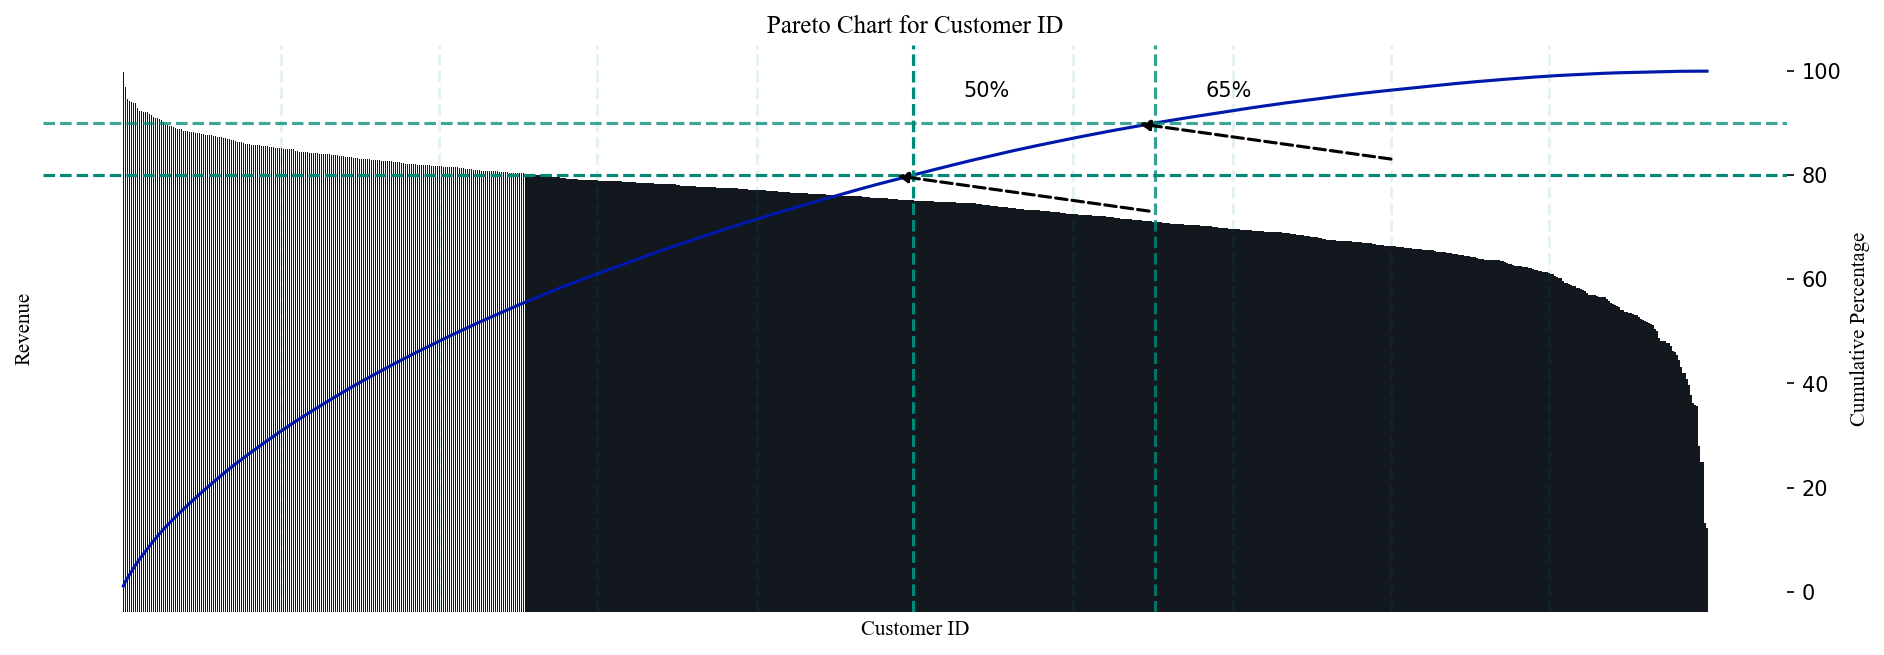

In [316]:
create_pareto_plot(df_CustomersSales, "Customer ID", "Sales", log = True) #plot it and log it to see clearly

#### Summary:
- we can see that 80% of superstore sales comes from top 50% of the customers.
- 90% of the superstore sales comes from top 65% of customers.
- Hence, Pareto Principle does not apply on customers.

## Pareto Principle Check - States V.S. Profit

In [225]:
StatesProfit = df_orders.groupby('State')['Profit'].sum().sort_values(ascending=False)
df_StatesProfit = pd.DataFrame(StatesProfit)
df_StatesProfit = df_StatesProfit[(df_StatesProfit[df_StatesProfit.columns] >= 0).all(axis=1)] #extract columns only if profit >=0
df_StatesProfit['CumulativePercentage'] = (df_StatesProfit.cumsum() / df_StatesProfit.sum() * 100).round(2)
df_StatesProfit

,Profit,CumulativePercentage
State,,
California,76381.3871,19.86
New York,74038.5486,39.11
Washington,33402.6517,47.79
Michigan,24463.1876,54.15
Virginia,18597.9504,58.99
Indiana,18382.9363,63.76
Georgia,16250.0433,67.99
Kentucky,11199.6966,70.90
Minnesota,10823.1874,73.71


In [317]:
def create_pareto_plot(df, col, price, log = True):
    
    plt.rcParams["axes.facecolor"] = "#FFFFFF"
    fig, ax = plt.subplots(figsize = (15, 5), dpi = 150, facecolor = "#FFFFFF")
    plt.rcParams["axes.grid"] = False
    
    if log == True:
        sns.barplot(x = np.arange(len(df)), y = np.log(df[price]),  ax = ax, color = "#101820")
        ax.set_ylabel("Total Price (Log - Scale)")
    else:
        sns.barplot(x = np.arange(len(df)), y = df[price],  ax = ax, color = "#101820")

    ax2 = ax.twinx()
    
    sns.lineplot(x = np.arange(len(df)), y = df.CumulativePercentage, ax = ax2, color = "#0019AA")
    ax2.axhline(80, color = "#008878", linestyle = "dashed", alpha = 1)
    ax2.axhline(90, color = "#008878", linestyle = "dashed", alpha = 0.75)

    vlines = [int(len(df) * x / 10) for x in range(1, 10)]
    for vline in vlines: ax2.axvline(vline, color = "#008878", linestyle = "dashed", alpha = 0.1)
        
    interaction_80 = (df.shape[0] - df[df.CumulativePercentage >= 80].shape[0])
    ax2.axvline(interaction_80, color = "#008878", linestyle = "dashed", alpha = 1)

    interaction_80_percentage = round((interaction_80 / df.shape[0]) * 100)
    plt.text(interaction_80 + 25, 95, str(interaction_80_percentage) + "%")   
    
    prop = dict(arrowstyle= "-|>", color = "#000000", lw = 1.5, ls = "--")
    plt.annotate("", xy = (interaction_80 - 10, 80),  xytext = (interaction_80 + 120 , 73), arrowprops = prop)
    
    interaction_90 = (df.shape[0] - df[df.CumulativePercentage >= 90].shape[0])
    ax2.axvline(interaction_90, color = "#008878", linestyle = "dashed", alpha = 0.8)
    interaction_90_percentage = round((interaction_90 / df.shape[0]) * 100)
    plt.text(interaction_90 + 25, 95, str(interaction_90_percentage) + "%")   
    plt.annotate("", xy = (interaction_90 - 10, 90),  xytext = (interaction_90 + 120 , 83), arrowprops = prop)

    ax2.yaxis
    ax.set_yticks([])
    plt.xticks([])
    ax.set_ylabel("Profit", fontname = "Times New Roman")
    ax2.set_ylabel("Cumulative Percentage", fontname = "Times New Roman")
    subject = "States" if col == "States" else "Products"
    plt.title("Pareto Chart for " + subject, fontname = "Times New Roman")
    ax.set_xlabel(subject, fontname = "Times New Roman")
    sns.despine(left = True, right = True, bottom = True, top = True)
    plt.show()

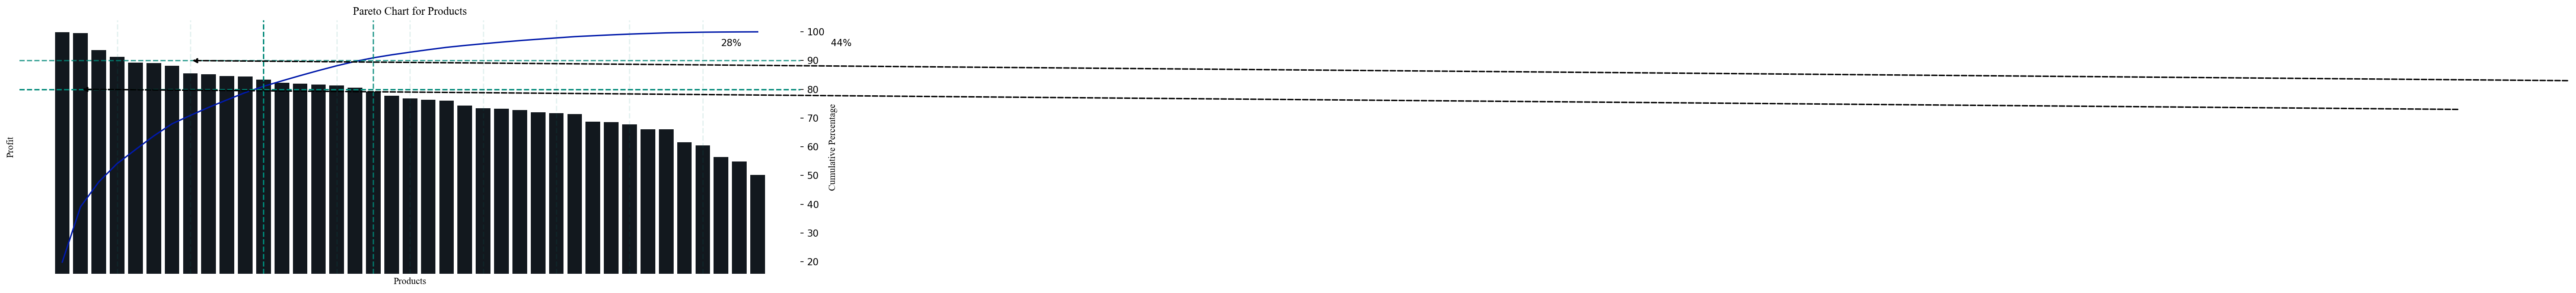

In [318]:
create_pareto_plot(df_StatesProfit, "State", "Profit", log = True) #plot it and log it to see clearly

#### Summary:
- we can see that 80% of superstore sales comes from top 28% of the states.
- 90% of the superstore sales comes from top 44% of states.
- Hence, Pareto Principle does not apply on states.

## Pareto Principle Check - Categories V.S. Profit

In [230]:
ProductProfit = df_orders.groupby('ProductID5')['Profit'].sum().sort_values(ascending=False)
df_ProductProfit = pd.DataFrame(ProductProfit)
df_ProductProfit = df_ProductProfit[(df_ProductProfit[df_ProductProfit.columns] >= 0).all(axis=1)] #extract columns only if profit >=0
df_ProductProfit['CumulativePercentage'] = (df_ProductProfit.cumsum() / df_ProductProfit.sum() * 100).round(2)
df_ProductProfit

,Profit,CumulativePercentage
ProductID5,,
TEC-CO,55617.8249,18.01
TEC-PH,44515.7306,32.43
TEC-AC,41936.6357,46.01
OFF-PA,34053.5693,57.04
OFF-BI,30221.7633,66.83
FUR-CH,26590.1663,75.44
OFF-ST,21278.8264,82.33
OFF-AP,18138.0054,88.20
FUR-FU,13059.1436,92.43


In [319]:
def create_pareto_plot(df, col, price, log = True):
    
    plt.rcParams["axes.facecolor"] = "#FFFFFF"
    fig, ax = plt.subplots(figsize = (15, 5), dpi = 150, facecolor = "#FFFFFF")
    plt.rcParams["axes.grid"] = False
    
    if log == True:
        sns.barplot(x = np.arange(len(df)), y = np.log(df[price]),  ax = ax, color = "#101820")
        ax.set_ylabel("Total Price (Log - Scale)")
    else:
        sns.barplot(x = np.arange(len(df)), y = df[price],  ax = ax, color = "#101820")

    ax2 = ax.twinx()
    
    sns.lineplot(x = np.arange(len(df)), y = df.CumulativePercentage, ax = ax2, color = "#0019AA")
    ax2.axhline(80, color = "#008878", linestyle = "dashed", alpha = 1)
    ax2.axhline(90, color = "#008878", linestyle = "dashed", alpha = 0.75)

    vlines = [int(len(df) * x / 10) for x in range(1, 10)]
    for vline in vlines: ax2.axvline(vline, color = "#008878", linestyle = "dashed", alpha = 0.1)
        
    interaction_80 = (df.shape[0] - df[df.CumulativePercentage >= 80].shape[0])
    ax2.axvline(interaction_80, color = "#008878", linestyle = "dashed", alpha = 1)

    interaction_80_percentage = round((interaction_80 / df.shape[0]) * 100)
    plt.text(interaction_80 + 25, 95, str(interaction_80_percentage) + "%")   
    
    prop = dict(arrowstyle= "-|>", color = "#000000", lw = 1.5, ls = "--")
    plt.annotate("", xy = (interaction_80 - 10, 80),  xytext = (interaction_80 + 120 , 73), arrowprops = prop)
    
    interaction_90 = (df.shape[0] - df[df.CumulativePercentage >= 90].shape[0])
    ax2.axvline(interaction_90, color = "#008878", linestyle = "dashed", alpha = 0.8)
    interaction_90_percentage = round((interaction_90 / df.shape[0]) * 100)
    plt.text(interaction_90 + 25, 95, str(interaction_90_percentage) + "%")   
    plt.annotate("", xy = (interaction_90 - 10, 90),  xytext = (interaction_90 + 120 , 83), arrowprops = prop)

    ax2.yaxis
    ax.set_yticks([])
    plt.xticks([])
    ax.set_ylabel("Profit", fontname = "Times New Roman")
    ax2.set_ylabel("Cumulative Percentage", fontname = "Times New Roman")
    subject = "Product" if col == "Product" else "Products"
    plt.title("Pareto Chart for " + subject, fontname = "Times New Roman")
    ax.set_xlabel(subject, fontname = "Times New Roman")
    sns.despine(left = True, right = True, bottom = True, top = True)
    plt.show()

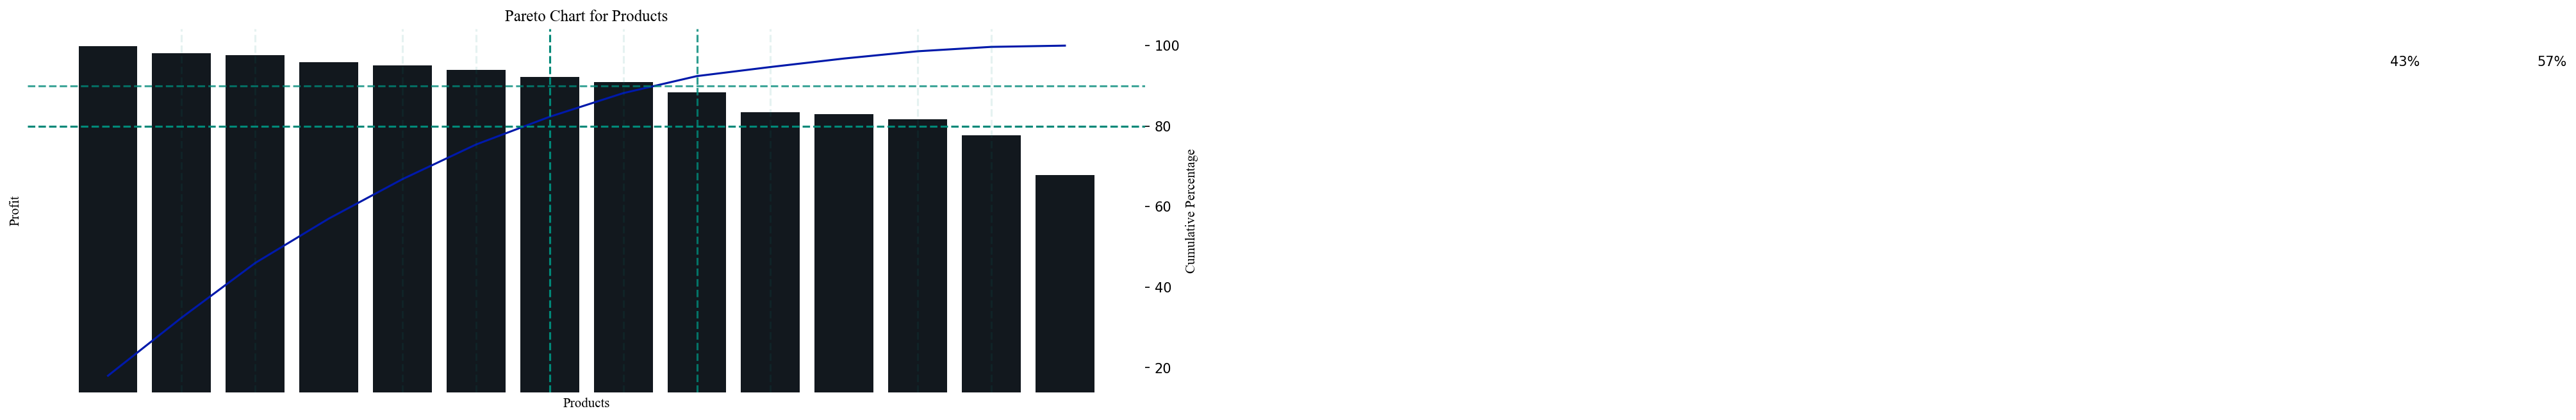

In [320]:
create_pareto_plot(df_ProductProfit, "ProductID5", "Profit", log = True) #plot it and log it to see clearly

#### Summary:
- we can see that 80% of superstore sales comes from top 43% of the products.
- 90% of the superstore sales comes from top 57% of products.
- Hence, Pareto Principle does not apply on products.

## Pareto Principle Check - Customers V.S. Profit

In [236]:
CustomersProfit = df_orders.groupby('Customer ID')['Profit'].sum().sort_values(ascending=False)
df_CustomersProfit = pd.DataFrame(CustomersProfit)
df_CustomersProfit = df_CustomersProfit[(df_CustomersProfit[df_CustomersProfit.columns] >= 0).all(axis=1)] #extract columns only if profit >=0
df_CustomersProfit['CumulativePercentage'] = (df_CustomersProfit.cumsum() / df_CustomersProfit.sum() * 100).round(2)
df_CustomersProfit

,Profit,CumulativePercentage
Customer ID,,
TC-20980,8981.3239,2.51
RB-19360,6976.0959,4.46
SC-20095,5757.4119,6.07
HL-15040,5622.4292,7.64
AB-10105,5444.8055,9.17
...,...,...
CJ-11875,1.6520,100.00
EB-13930,0.6042,100.00
LD-16855,0.4641,100.00


In [321]:
def create_pareto_plot(df, col, price, log = True):
    
    plt.rcParams["axes.facecolor"] = "#FFFFFF"
    fig, ax = plt.subplots(figsize = (15, 5), dpi = 150, facecolor = "#FFFFFF")
    plt.rcParams["axes.grid"] = False
    
    if log == True:
        sns.barplot(x = np.arange(len(df)), y = np.log(df[price]),  ax = ax, color = "#101820")
        ax.set_ylabel("Total Price (Log - Scale)")
    else:
        sns.barplot(x = np.arange(len(df)), y = df[price],  ax = ax, color = "#101820")

    ax2 = ax.twinx()
    
    sns.lineplot(x = np.arange(len(df)), y = df.CumulativePercentage, ax = ax2, color = "#0019AA")
    ax2.axhline(80, color = "#008878", linestyle = "dashed", alpha = 1)
    ax2.axhline(90, color = "#008878", linestyle = "dashed", alpha = 0.75)

    vlines = [int(len(df) * x / 10) for x in range(1, 10)]
    for vline in vlines: ax2.axvline(vline, color = "#008878", linestyle = "dashed", alpha = 0.1)
        
    interaction_80 = (df.shape[0] - df[df.CumulativePercentage >= 80].shape[0])
    ax2.axvline(interaction_80, color = "#008878", linestyle = "dashed", alpha = 1)

    interaction_80_percentage = round((interaction_80 / df.shape[0]) * 100)
    plt.text(interaction_80 + 25, 95, str(interaction_80_percentage) + "%")   
    
    prop = dict(arrowstyle= "-|>", color = "#000000", lw = 1.5, ls = "--")
    plt.annotate("", xy = (interaction_80 - 10, 80),  xytext = (interaction_80 + 120 , 73), arrowprops = prop)
    
    interaction_90 = (df.shape[0] - df[df.CumulativePercentage >= 90].shape[0])
    ax2.axvline(interaction_90, color = "#008878", linestyle = "dashed", alpha = 0.8)
    interaction_90_percentage = round((interaction_90 / df.shape[0]) * 100)
    plt.text(interaction_90 + 25, 95, str(interaction_90_percentage) + "%")   
    plt.annotate("", xy = (interaction_90 - 10, 90),  xytext = (interaction_90 + 120 , 83), arrowprops = prop)

    ax2.yaxis
    ax.set_yticks([])
    plt.xticks([])
    ax.set_ylabel("Profit", fontname = "Times New Roman")
    ax2.set_ylabel("Cumulative Percentage", fontname = "Times New Roman")
    subject = "Customer ID" if col == "Customer ID" else "Products"
    plt.title("Pareto Chart for " + subject, fontname = "Times New Roman")
    ax.set_xlabel(subject, fontname = "Times New Roman")
    sns.despine(left = True, right = True, bottom = True, top = True)
    plt.show()

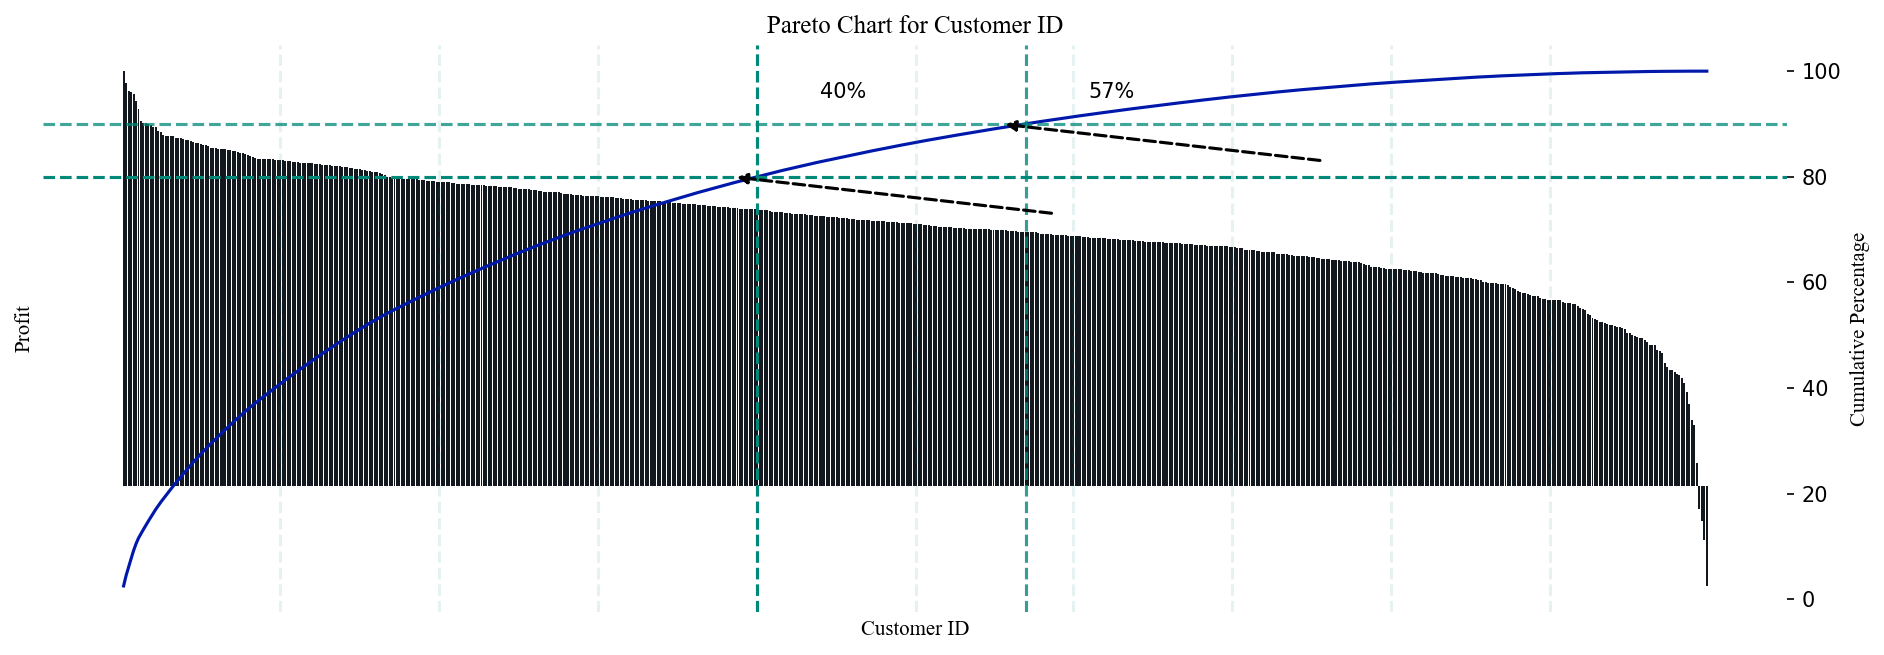

In [322]:
create_pareto_plot(df_CustomersProfit, "Customer ID", "Profit", log = True) #plot it and log it to see clearly

#### Summary:
- we can see that 80% of superstore sales comes from top 40% of the customers.
- 90% of the superstore sales comes from top 57% of customers.
- Hence, Pareto Principle does not apply on customers.

In [242]:
df_CustomersProfit.quantile(0.8, interpolation='higher')

Profit                  793.2814
CumulativePercentage     97.8600
Name: 0.8, dtype: float64

In [243]:
df_CustomersProfit[df_CustomersProfit['Profit']>=793.2814].sum()/df_orders['Profit'].sum()

Profit                  0.736958
CumulativePercentage    0.017215
dtype: float64

Top 20% of the customers by profit contributed to 74% of the profit. Pareto Principle does not apply.

When it comes to including negative profits in a Pareto analysis, the answer may depend on the specific goals of the analysis. In some cases, including negative profits may provide useful insights into areas of the business that are not performing well and may require attention. However, in other cases, it may make more sense to exclude negative profits from the analysis, particularly if the negative profits are due to one-time events or unusual circumstances.

If the negative profits are a regular occurrence and are part of the normal business operations, it may be appropriate to include them in the analysis. In this case, negative profits would be considered part of the "effects" that are being analyzed in relation to the "causes" of the profits.

Ultimately, the decision to include or exclude negative profits from a Pareto analysis will depend on the specific goals of the analysis and the nature of the negative profits in question. It is important to carefully consider the potential impact of including or excluding negative profits on the insights gained from the analysis.

# Customers V.S. Sales V.S. Profit

Include all customers regardless of positive or negative profit

In [260]:
df_customers = pd.DataFrame(df_orders.groupby('Customer ID')['Sales'].sum())

In [261]:
df_customers['Profit'] = pd.DataFrame(df_orders.groupby("Customer ID")['Profit'].sum())
df_customers

,Sales,Profit
Customer ID,,
AA-10315,5563.560,-362.8825
AA-10375,1056.390,277.3824
AA-10480,1790.512,435.8274
AA-10645,5086.935,857.8033
AB-10015,886.156,129.3465
...,...,...
XP-21865,2374.658,621.2300
YC-21895,5454.350,1305.6290
YS-21880,6720.444,1778.2923


In [262]:
# if profit < 0, red, otherwise green
def type(profit):
    if profit < 0:
        return 'red'
    else:
        return 'green'
    

# create a new column called 'colour_code', and apply function type to profit into colour_code
df_customers.loc[:,'colour_code'] = df_customers.loc[:,'Profit'].apply(type)

In [263]:
df_customers

,Sales,Profit,colour_code
Customer ID,,,
AA-10315,5563.560,-362.8825,red
AA-10375,1056.390,277.3824,green
AA-10480,1790.512,435.8274,green
AA-10645,5086.935,857.8033,green
AB-10015,886.156,129.3465,green
...,...,...,...
XP-21865,2374.658,621.2300,green
YC-21895,5454.350,1305.6290,green
YS-21880,6720.444,1778.2923,green


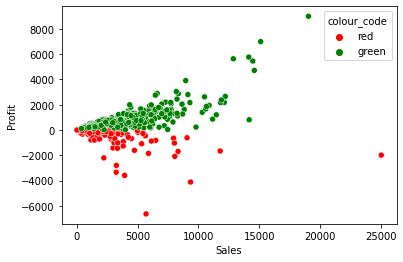

In [324]:
sns.scatterplot(data=df_customers, hue='colour_code', x='Sales',y='Profit', palette=['red', 'green']);

There is 1 outlier, where the customer is a top customer by sales but with negative profit. So we'll need to turn they into positive profit. However, base on the trend, it looks like this outlier customer is a one-time event.

In [281]:
df_customers.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,793.0,2896.848500,2628.670117,4.8330,1146.0500,2256.3940,3785.2760,25043.0500
Profit,793.0,361.156396,894.261812,-6626.3895,36.6131,227.8338,560.0078,8981.3239


In [303]:
df_customers['colour_code'].unique()

array(['red', 'green'], dtype=object)

In [306]:
df_customers['colour_code'].value_counts()

green    638
red      155
Name: colour_code, dtype: int64

Findings:
- 20% of customers purchases are negative profit

# Sales & Profit by Categories, Sub-Categories

### Categories

In [273]:
# Sales by Categories
df_orders.groupby('Category')['Sales'].sum().sort_values(ascending=False)

Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64

In [274]:
# Profit by Categories
df_orders.groupby('Category')['Profit'].sum().sort_values(ascending=False)

Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64

In [278]:
df_category = pd.DataFrame(df_orders.groupby('Category')['Sales'].sum())
df_category['Profit'] = pd.DataFrame(df_orders.groupby('Category')['Profit'].sum())
df_category

,Sales,Profit
Category,,
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008
Technology,836154.0330,145454.9481


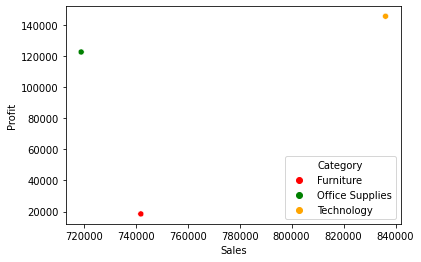

In [339]:
sns.scatterplot(data=df_category, hue='Category', x='Sales',y='Profit', palette=['red', 'green', 'orange']);

In [280]:
df_category['Profitability'] = df_category['Profit']/df_category['Sales']
df_category

,Sales,Profit,Profitability
Category,,,
Furniture,741999.7953,18451.2728,0.024867
Office Supplies,719047.0320,122490.8008,0.170352
Technology,836154.0330,145454.9481,0.173957


Findings:
- Highest Sales: Technology, with the highest profit.
- Lowest Sales: Office Supplies, with second highest profit.
- Technology is the highest profitability category.

## Sub-Categories

In [282]:
# Sales by Sub-Categories
df_orders.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

Sub-Category
Phones         330007.0540
Chairs         328449.1030
Storage        223843.6080
Tables         206965.5320
Binders        203412.7330
Machines       189238.6310
Accessories    167380.3180
Copiers        149528.0300
Bookcases      114879.9963
Appliances     107532.1610
Furnishings     91705.1640
Paper           78479.2060
Supplies        46673.5380
Art             27118.7920
Envelopes       16476.4020
Labels          12486.3120
Fasteners        3024.2800
Name: Sales, dtype: float64

In [283]:
# Profit by Categories
df_orders.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)

Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Chairs         26590.1663
Storage        21278.8264
Appliances     18138.0054
Furnishings    13059.1436
Envelopes       6964.1767
Art             6527.7870
Labels          5546.2540
Machines        3384.7569
Fasteners        949.5182
Supplies       -1189.0995
Bookcases      -3472.5560
Tables        -17725.4811
Name: Profit, dtype: float64

In [284]:
df_sub_category = pd.DataFrame(df_orders.groupby('Sub-Category')['Sales'].sum())
df_sub_category['Profit'] = pd.DataFrame(df_orders.groupby('Sub-Category')['Profit'].sum())
df_sub_category

,Sales,Profit
Sub-Category,,
Accessories,167380.3180,41936.6357
Appliances,107532.1610,18138.0054
Art,27118.7920,6527.7870
Binders,203412.7330,30221.7633
Bookcases,114879.9963,-3472.5560
Chairs,328449.1030,26590.1663
Copiers,149528.0300,55617.8249
Envelopes,16476.4020,6964.1767
Fasteners,3024.2800,949.5182


<AxesSubplot:xlabel='Sales', ylabel='Profit'>

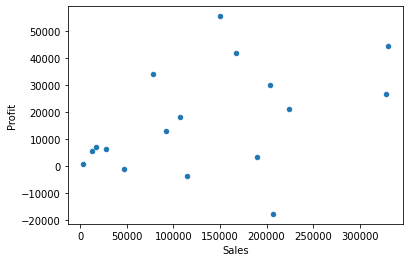

In [328]:
df_sub_category.plot.scatter(x='Sales', y='Profit')

In [286]:
df_sub_category['Profitability'] = df_sub_category['Profit']/df_sub_category['Sales']
df_sub_category

,Sales,Profit,Profitability
Sub-Category,,,
Accessories,167380.3180,41936.6357,0.250547
Appliances,107532.1610,18138.0054,0.168675
Art,27118.7920,6527.7870,0.240711
Binders,203412.7330,30221.7633,0.148574
Bookcases,114879.9963,-3472.5560,-0.030228
Chairs,328449.1030,26590.1663,0.080957
Copiers,149528.0300,55617.8249,0.371956
Envelopes,16476.4020,6964.1767,0.422676
Fasteners,3024.2800,949.5182,0.313965


Findings:
- The Top 5 Most Profitable Sub-Categories are: 
    - Labels 44.42%, Paper 43.39%, Envelops 42.27%,  Copiers 37.20%, Fasteners 32.40%
- The 5 Worst Profitable Sub-Categories are:
    - Tables -0.09%, Bookcases -0.03%, Supplies -0.025%, Phones 0.013%, Chairs 0.081% 

# Time Series Analysis

<AxesSubplot:xlabel='OrderYr'>

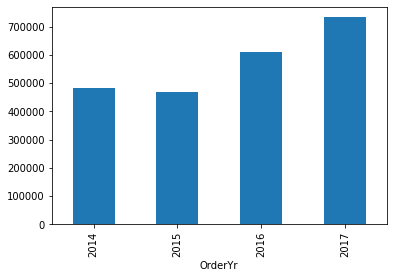

In [329]:
df_orders.groupby('OrderYr')['Sales'].sum().plot.bar()

<AxesSubplot:xlabel='OrderYr'>

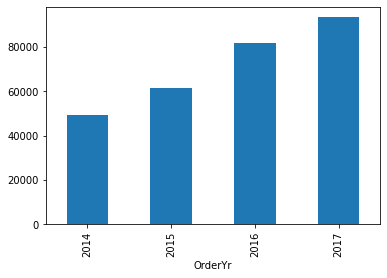

In [330]:
df_orders.groupby('OrderYr')['Profit'].sum().plot.bar()

<AxesSubplot:xlabel='OrderMth'>

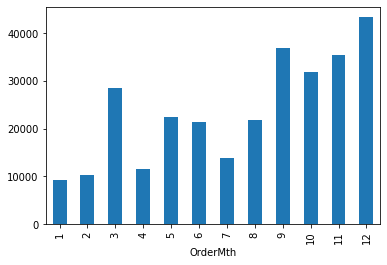

In [331]:
df_orders.groupby('OrderMth')['Profit'].sum().plot.bar()

<AxesSubplot:xlabel='OrderMth'>

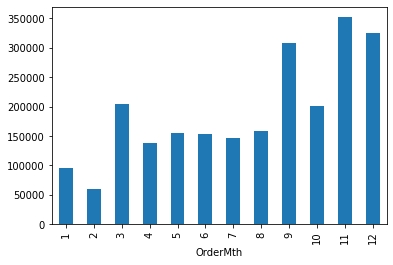

In [332]:
df_orders.groupby('OrderMth')['Sales'].sum().plot.bar()

In [294]:
df_orders.groupby(['OrderYr', 'OrderMth'])['Sales'].sum()

OrderYr  OrderMth
2014     1            14236.8950
         2             4519.8920
         3            55691.0090
         4            28295.3450
         5            23648.2870
         6            34595.1276
         7            33946.3930
         8            27909.4685
         9            81777.3508
         10           31453.3930
         11           78628.7167
         12           69545.6205
2015     1            18174.0756
         2            11951.4110
         3            38726.2520
         4            34195.2085
         5            30131.6865
         6            24797.2920
         7            28765.3250
         8            36898.3322
         9            64595.9180
         10           31404.9235
         11           75972.5635
         12           74919.5212
2016     1            18542.4910
         2            22978.8150
         3            51715.8750
         4            38750.0390
         5            56987.7280
         6            403

### Trends of Sales

<AxesSubplot:xlabel='OrderYr,OrderMth'>

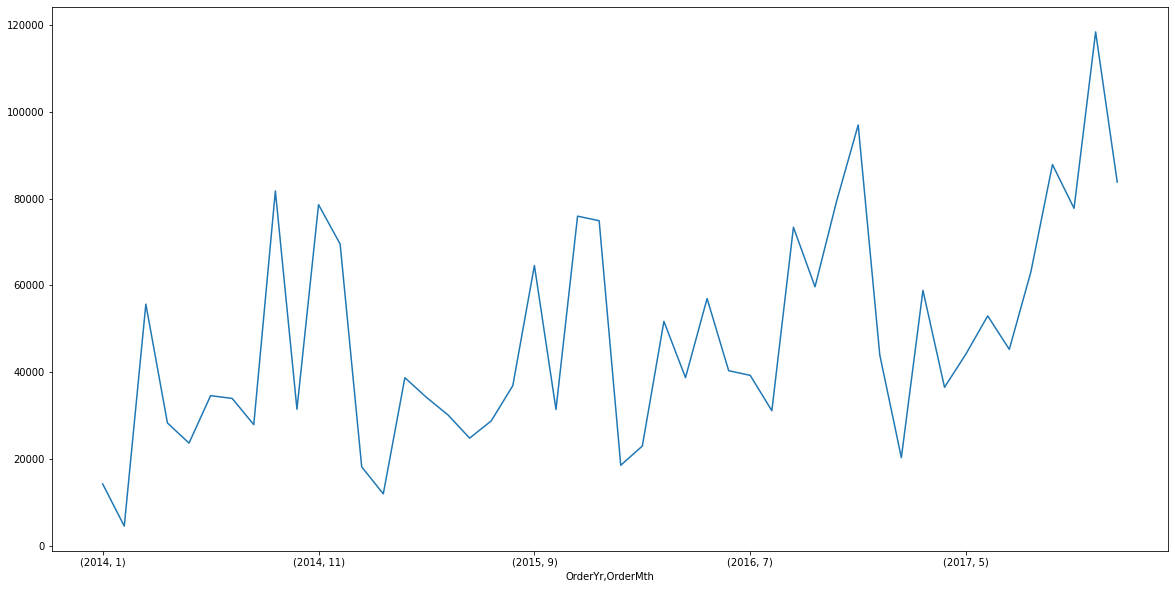

In [333]:
plt.figure(figsize=(20, 10))
df_orders.groupby(['OrderYr', 'OrderMth'])['Sales'].sum().plot()

### Trends of Profit

<AxesSubplot:xlabel='OrderYr,OrderMth'>

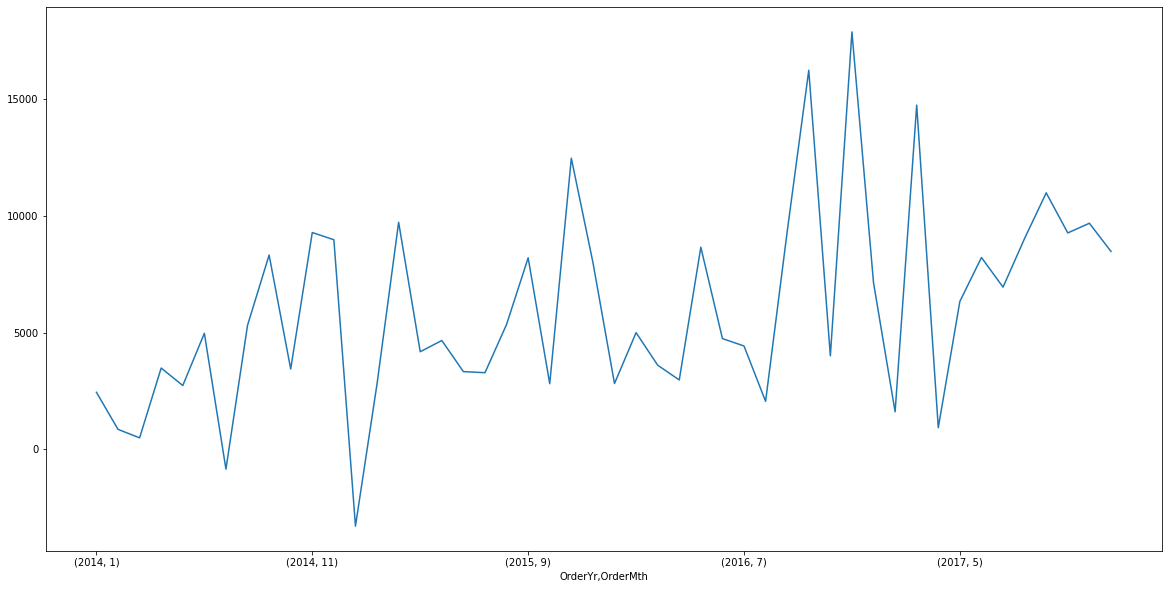

In [334]:
plt.figure(figsize=(20, 10))
df_orders.groupby(['OrderYr', 'OrderMth'])['Profit'].sum().plot()

Findings:
- Both Sales and Profit have been growing year over year.
- There seems to have seasonality for both Sales and Profit, especially in September - December.
- Low season seems to be in the beginner of the year, with March being exception. 
    - Reasons could be: Spring break, reading break, holidays such as St. Patrick that prompt purchases.

# Future Consideration:

- Identify areas for improvement where the states with highest sales that also have negative profit. Suggestions to take into considerations are states holidays, states promotions, buying patterns through seasonality, salary ranges, etc..
- Consider to prioritize states with high sales with low profit V.S. states with highest sales with highest profit (resource dependent)
- Identify areas for improvement for profitability. Goal is to decrease the negative profit incrementally (representing 20% of all customers purchases), from 20% to 15% and so on.